In [1]:
import numpy as np
import scipy.sparse as sps
import porepy as pp
import math
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../class")
from Flow_class import Flow

In [3]:
Nx=100
L=0.045
#phys_dims=[1,1]
phys_dims=[L]
#g=pp.CartGrid([Nx,Ny],phys_dims)
g=pp.CartGrid([Nx],phys_dims)
g.compute_geometry()
#pp.plot_grid(g,figsize=(15,12))
#p.plot_grid(g)

In [4]:
# Permeability
perm = pp.SecondOrderTensor(1e-9*np.ones(g.num_cells))  
f_lambda= lambda x,y,z: 0.0
# Boundary conditions
b_faces = g.tags['domain_boundary_faces'].nonzero()[0]
bc = pp.BoundaryCondition(g, b_faces, ['dir']*b_faces.size)
bc_val = np.zeros(g.num_faces)
bc_val[0]=0.3
bc_val[bc_val.size-1]=0.0

# Collect all parameters in a dictionary
parameters = {"second_order_tensor": perm, "f_lambda": f_lambda, "bc": bc, "bc_values": bc_val}

In [5]:
flow=Flow(g,parameters,"MVEM")
flow.set_source()
p=flow.solve()

MVEM


[0.2985 0.2955 0.2925 0.2895 0.2865 0.2835 0.2805 0.2775 0.2745 0.2715
 0.2685 0.2655 0.2625 0.2595 0.2565 0.2535 0.2505 0.2475 0.2445 0.2415
 0.2385 0.2355 0.2325 0.2295 0.2265 0.2235 0.2205 0.2175 0.2145 0.2115
 0.2085 0.2055 0.2025 0.1995 0.1965 0.1935 0.1905 0.1875 0.1845 0.1815
 0.1785 0.1755 0.1725 0.1695 0.1665 0.1635 0.1605 0.1575 0.1545 0.1515
 0.1485 0.1455 0.1425 0.1395 0.1365 0.1335 0.1305 0.1275 0.1245 0.1215
 0.1185 0.1155 0.1125 0.1095 0.1065 0.1035 0.1005 0.0975 0.0945 0.0915
 0.0885 0.0855 0.0825 0.0795 0.0765 0.0735 0.0705 0.0675 0.0645 0.0615
 0.0585 0.0555 0.0525 0.0495 0.0465 0.0435 0.0405 0.0375 0.0345 0.0315
 0.0285 0.0255 0.0225 0.0195 0.0165 0.0135 0.0105 0.0075 0.0045 0.0015]


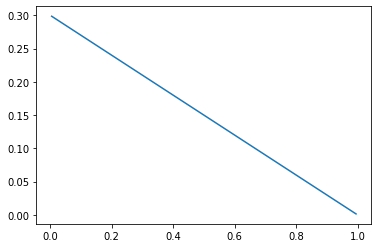

In [6]:
h=1/Nx
x=np.linspace(1/(2*Nx),1-1/(2*Nx),Nx)
plt.plot(x,p)
print(p)

In [7]:
vel=flow.get_flux(p)
x_vel=np.linspace(0,L,g.num_faces)
#plt.plot(x_vel,vel)
print(vel)

[6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.66666667e-09 6.66666667e-09 6.66666667e-09
 6.66666667e-09 6.666666